In [16]:
from PIL import Image,ImageDraw,ImageFont

Problem statement:

People often spend a lot of time browsing through online shopping websites, but the coversion rate into purchases is low. Determine the likelihood of purchase based on the given features in the datsaset. The dataset consists of feature vectors belonging to 12,330 online sessions. The purpose of this project is to identify user behaviour patterns to effectively understand features that influence the sales.




Instructions:
    
1.	Perform the required data pre-processing to treat for missing values and outliers.
2.	Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3.	Divide the given data into train and test sets
4.	Predict how likely it is for a customer to make a purchase by building classification models
5.	Interpret how each of the X variables influence the conversion propensity
6.	Evaluate the model performance measures and choose the most optimum model
7.	Enlist your key findings based on the most optimum model and the respective feature importance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  



from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset and performing EDA

In [4]:
## Reading the dataset
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


This data description chart shows that most of the attributes are highly right skewed with the presence of a large number of outliers

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There aren't any null values in this dataset

In [8]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [9]:
df.shape

(12330, 18)

The dataset contains 12330 rows and 18 attributes of which the 'Revenue' column in our target variable.

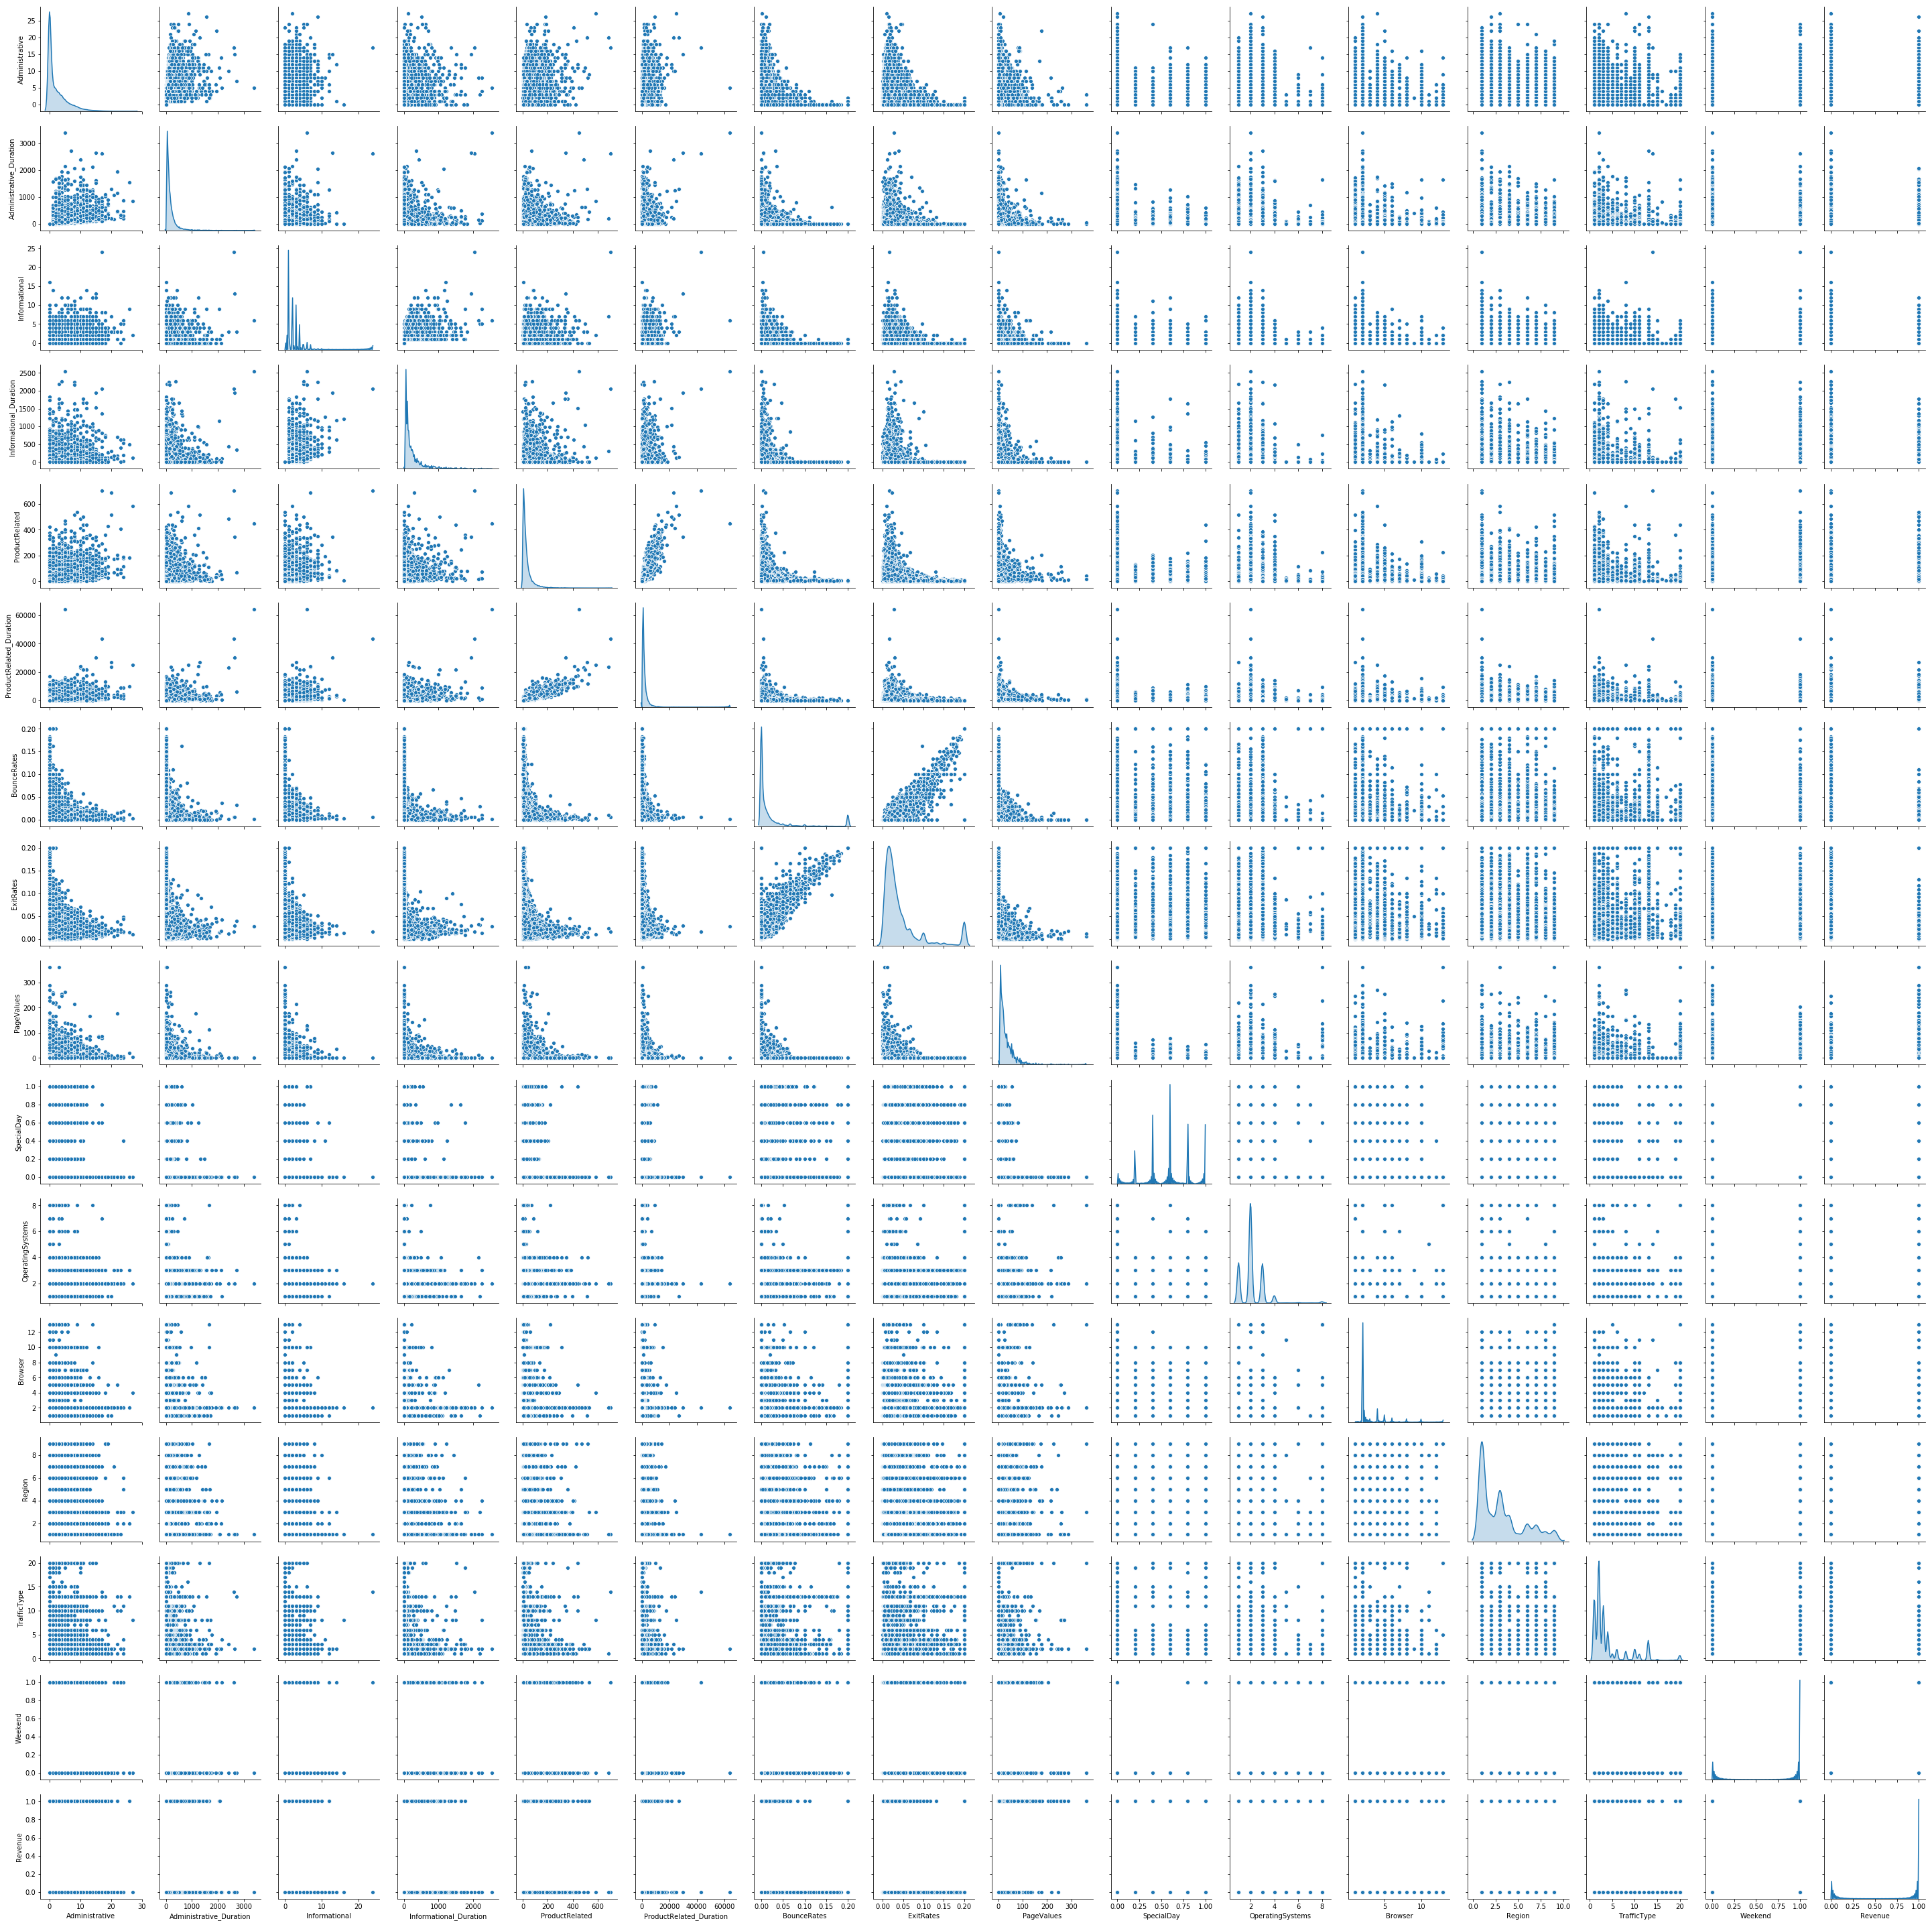

In [10]:
sns.pairplot(df,diag_kind='kde')
plt.show()

# Visualizations for more in-depth analysis

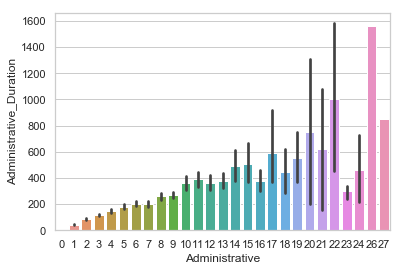

In [12]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Administrative", y="Administrative_Duration", data=df)

In general this plot shows tha as people visit more and more admin pages, the duration that they spend on admin pages also increases

In [13]:
df['Administrative'].value_counts(normalize=True)*100

0     46.780211
1     10.981346
2      9.034874
3      7.420925
4      6.204380
5      4.663423
6      3.503650
7      2.741281
8      2.327656
9      1.824818
10     1.240876
11     0.851582
12     0.697486
13     0.454177
14     0.356853
15     0.308191
16     0.194647
17     0.129765
18     0.097324
19     0.048662
24     0.032441
22     0.032441
23     0.024331
20     0.016221
21     0.016221
26     0.008110
27     0.008110
Name: Administrative, dtype: float64

Since most of our values from the Administrative attribute is skewed towards the lower values(0 to 5) we create bins to make the distribution more evenly spread. We take administrtive value count of 0 in one bin , 1 and 2 in another bin , 2-5 views in the third bin , 5-10 views in the fourth bin and all admin visits more than 10 in the final bin.

# Converting in to bins

In [6]:
df['area_bins1']=np.nan
for i in range(len(df['Administrative'])):
    if df['Administrative'].iloc[i] == 0:
        df['area_bins1'].iloc[i] = '0-views'
    elif df['Administrative'].iloc[i] ==1:
        df['area_bins1'].iloc[i] = '1-2views'
    elif df['Administrative'].iloc[i] ==2:
        df['area_bins1'].iloc[i] = '2-5views'
    elif df['Administrative'].iloc[i] ==3:
        df['area_bins1'].iloc[i] = '5-10views'
    else:
        df['area_bins1'].iloc[i] = 'morethan10views'

In [7]:
df.area_bins1.value_counts()

0-views            5768
morethan10views    3179
1-2views           1354
2-5views           1114
5-10views           915
Name: area_bins1, dtype: int64

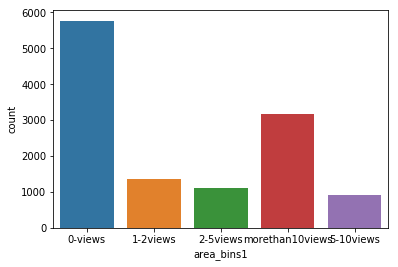

In [8]:
sns.countplot(df.area_bins1)
plt.show()

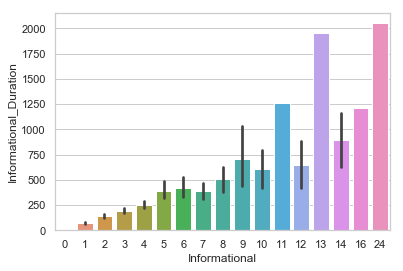

In [17]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Informational", y="Informational_Duration", data=df)

Again similarly we can see that as people visit more information related websites the duration they spend on the websites also increases. However let's check if people who really spend more time visiting lot of websites actually do turn out to buy the product.

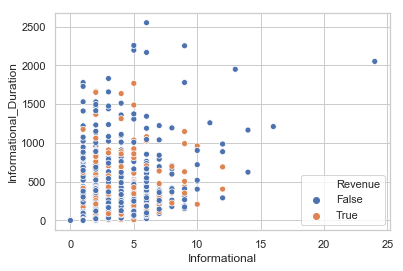

In [18]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="Informational", y="Informational_Duration", hue = 'Revenue' , data=df)

Surprisingly we find that most people who visit lower information related content and those who spend lower amount of time tend to have a better purchase rate.

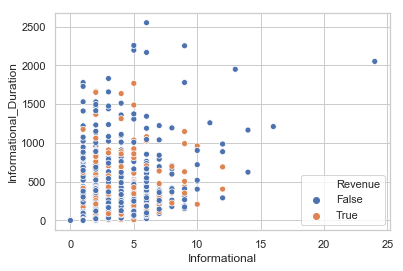

In [19]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="Informational", y="Informational_Duration", hue = 'Revenue' , data=df)

We find that the count of people who never visited any Informational related websites to be very high , so we create 2 bins one having people who never visited any info related website and another having people who visited info related websites.

In [20]:
df['Info_bins1']=np.nan
for i in range(len(df['Informational'])):
    if df['Informational'].iloc[i] == 0:
        df['Info_bins1'].iloc[i] = '0views'
    else:
        df['Info_bins1'].iloc[i] = 'morethan0views'

In [21]:
df.Info_bins1.value_counts()

0views            9699
morethan0views    2631
Name: Info_bins1, dtype: int64

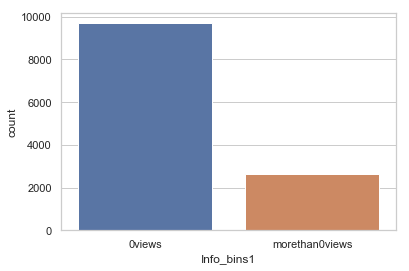

In [22]:
sns.countplot(df.Info_bins1)
plt.show()

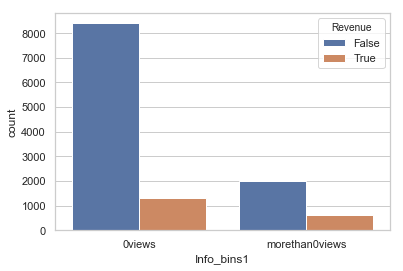

In [23]:
sns.countplot(x=df.Info_bins1,hue='Revenue', data = df)
plt.show()

Surprisingly we can see that people who haven't researched about the website have a better buying converson rate.

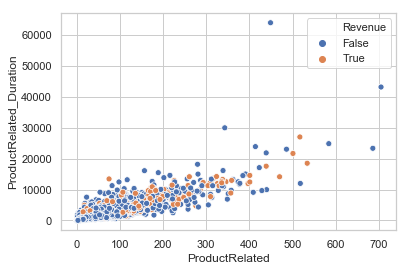

In [24]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration", hue = 'Revenue' , data=df)

From the above scatterplot we can see that there is a positive correlation between the number of product related views to the amount of duration for which the user views the product related content

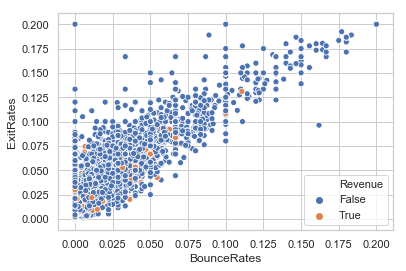

In [25]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="BounceRates", y="ExitRates" , hue = 'Revenue', data=df)


Again, in this plot we can see a high postitive correlation between the Bounce rates and Exit rates. For us, to understand this correlation let us understand what bounce rates are. Bounce rates refer to the number of users who just visit the website once and do not scroll through any of the pages and just quit the website on a glance. So from this it's a pretty obvious conclusion that high bounce rates and exit rates mean that very few people tend to buy the product. We see a higher number of orange spots (people who bought the product) towards the lower spectrum of our graph.

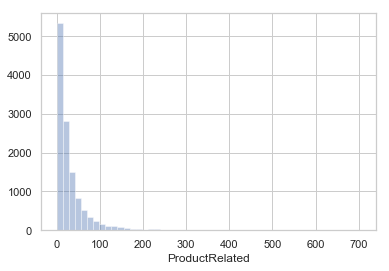

In [28]:
sns.distplot(df['ProductRelated'],kde = False)
plt.show()

In [31]:
df['ProductRelated'].value_counts()

1      622
2      465
3      458
4      404
6      396
7      391
5      382
8      370
10     330
9      317
12     313
11     308
13     289
15     270
16     260
14     251
17     226
20     225
19     218
22     213
18     200
21     199
24     192
23     180
27     177
26     155
25     154
28     144
30     142
29     135
      ... 
266      1
210      1
218      1
226      1
260      1
276      1
705      1
449      1
357      1
234      1
309      1
293      1
261      1
205      1
165      1
177      1
340      1
217      1
225      1
233      1
241      1
281      1
305      1
313      1
324      1
377      1
385      1
292      1
409      1
339      1
Name: ProductRelated, Length: 311, dtype: int64

We can see that most of the product views predominantly fall within the count of 100 , hence we split the data into bins to make the distribution more even.

In [12]:
df['product_bins1']=np.nan
for i in range(len(df['ProductRelated'])):
    if df['ProductRelated'].iloc[i] >= 0 and df['ProductRelated'].iloc[i] <= 5 :
        df['product_bins1'].iloc[i] = '0 to 5 views'
    elif df['ProductRelated'].iloc[i] > 5 and df['ProductRelated'].iloc[i] <= 10 :
        df['product_bins1'].iloc[i] = '5-10 views'
    elif df['ProductRelated'].iloc[i] > 10 and df['ProductRelated'].iloc[i] <= 50 :
        df['product_bins1'].iloc[i] = '10-50 views'
    else:
        df['product_bins1'].iloc[i] = 'more than 50 views'

In [13]:
df.product_bins1.value_counts()

10-50 views           6005
0 to 5 views          2369
more than 50 views    2152
5-10 views            1804
Name: product_bins1, dtype: int64

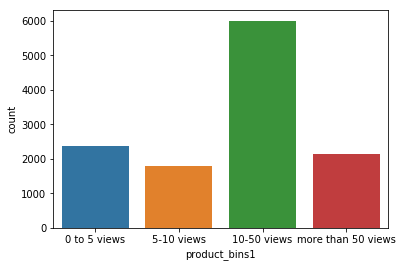

In [14]:
sns.countplot(df.product_bins1)
plt.show()

Here we find that the people predominantly visit the website 10 to 50 times

 # Bivariate analysis of each categorical column

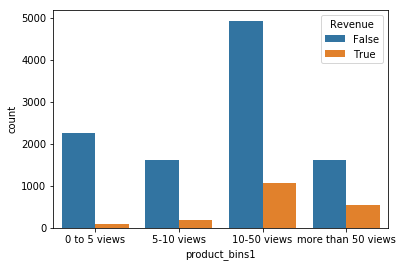

In [15]:
sns.countplot(x=df.product_bins1,hue='Revenue', data = df)
plt.show()

From the above plots we can decipher that people who tend to visit the website 10 to 50 times are the ones who are most likely to purchase a product.

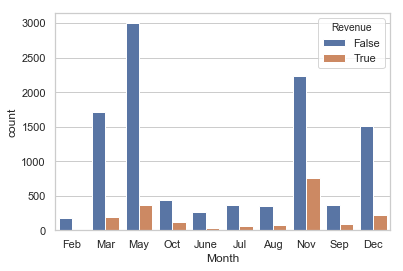

In [36]:
sns.countplot(x='Month',hue = 'Revenue',data = df)
plt.show()

From this plot we can see that we have the best sales conversion rate in the month of November followed by the month of May. This suggests that our website receieves a large number of footfalls and good conversion rates during the holiday season.

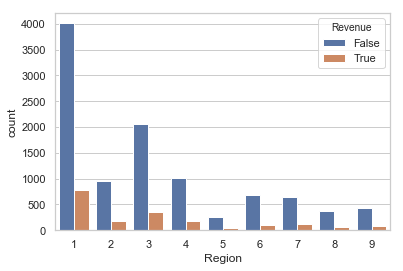

In [37]:
sns.countplot(x='Region', hue = 'Revenue', data = df)
plt.show()

Region-1 has the most footfalls and conversion rates followed by Region-3 and Region-4.

In [38]:
df['Weekend'].value_counts(normalize = True)

False    0.767397
True     0.232603
Name: Weekend, dtype: float64

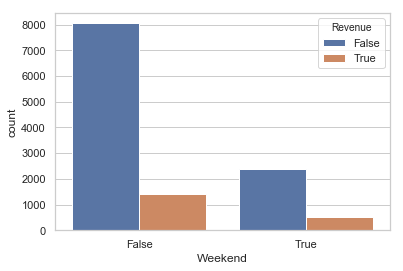

In [39]:
sns.countplot(x='Weekend',hue ='Revenue',data=df)
plt.show()

The total footfalls to the conversion rates seem to be higher on weekends.

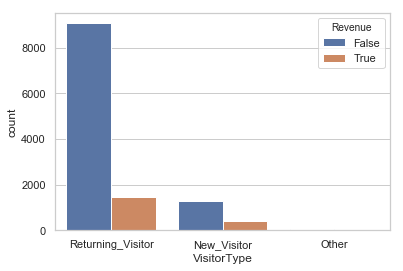

In [40]:
sns.countplot(x='VisitorType', hue = 'Revenue' , data =df)
plt.show()

This plot shows us that we have a large nuumber of visitors who return to our website but the number of returning visitors who purchase our product is much lower compared to the percentage of new visitors who purchase our products. Also, the number of new users visiting our website seems to be very low in number which means we could do some better digital marketing and probably improve the UI of our website to attract new users.

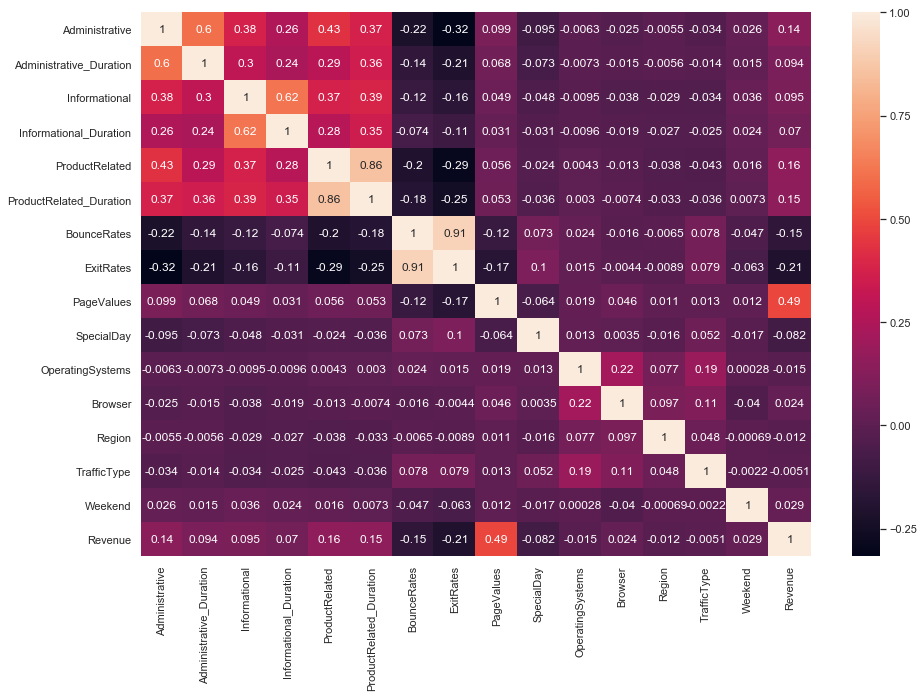

In [41]:
plt.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr , annot =True)
plt.show()

In [42]:
col_corr = df.columns
corr_matrix = df.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j] )>= 0.7):
            colname1 = corr_matrix.columns[i] # getting the name of column
            colname2 = corr_matrix.index[j] # getting the name of column
            print(colname1,colname2)
            print(corr_matrix.iloc[i, j])

#print(corr_matrix)

ProductRelated_Duration ProductRelated
0.8609268361763887
ExitRates BounceRates
0.9130043961814553


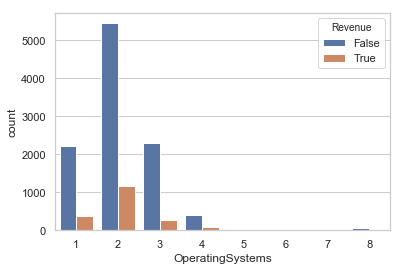

In [43]:
sns.countplot(x='OperatingSystems', hue = 'Revenue' , data =df)
plt.show()

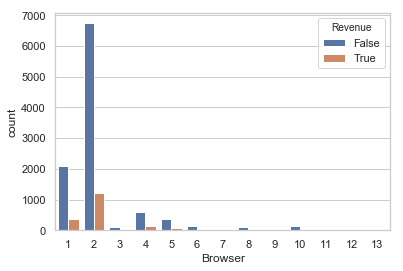

In [44]:
sns.countplot(x='Browser', hue = 'Revenue' , data =df)
plt.show()

OS 2 and Browser 2 generally recieve more footfalls to our websites and the conversion rate is also highest compared to others

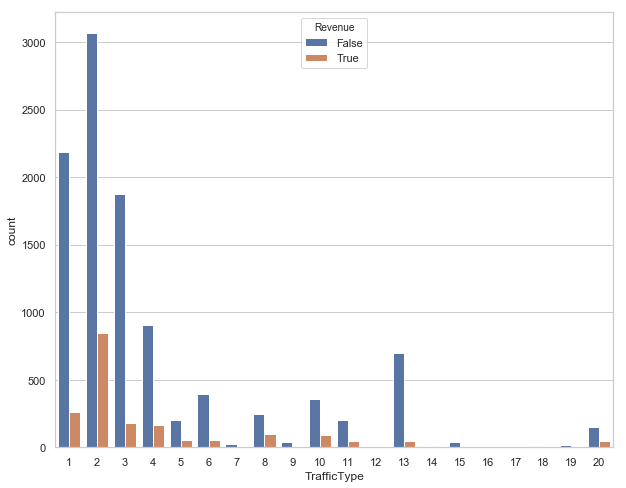

In [45]:
plt.figure(figsize = (10,8))
sns.countplot(x='TrafficType', hue = 'Revenue' , data =df)
plt.show()

Analysing buying patterns on Special Days

In [46]:
dff=pd.DataFrame(df.SpecialDay.value_counts())
dff

,SpecialDay
0.0,11079
0.6,351
0.8,325
0.4,243
0.2,178
1.0,154


In [47]:
dff['new'] = np.where(dff['SpecialDay']==11079,dff['SpecialDay']/330,dff['SpecialDay']/6)
dff

,SpecialDay,new
0.0,11079,33.572727
0.6,351,58.500000
0.8,325,54.166667
0.4,243,40.500000
0.2,178,29.666667
1.0,154,25.666667


# Converting all required columns into category

In [48]:
df[['SpecialDay','OperatingSystems','Browser','Region','TrafficType']]=\
df[['SpecialDay','OperatingSystems','Browser','Region','TrafficType']].astype('category')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null category
Month                      12330 non-null object
OperatingSystems           12330 non-null category
Browser                    12330 non-null category
Region                     12330 non-null category
TrafficType                12330 non-null category
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool


In [50]:
dff= df.drop(['Administrative', 'Informational','ProductRelated'], axis = 1) 

# Scaling and removing outliers for continuos columns

In [51]:
Cont_df = dff.select_dtypes(include=['float']).copy()
Cont_df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,64.000000,0.00,0.10,0.0
2,0.0,0.0,0.000000,0.20,0.20,0.0
3,0.0,0.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,627.500000,0.02,0.05,0.0


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(Cont_df))

In [53]:
df_scaled.columns=['Administrative_Duration', 'Informational_Duration','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

In [54]:
df_scaled.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.457191,-0.244931,-0.624348,3.667189,3.229316,-0.317178
1,-0.457191,-0.244931,-0.590903,-0.457683,1.171473,-0.317178
2,-0.457191,-0.244931,-0.624348,3.667189,3.229316,-0.317178
3,-0.457191,-0.244931,-0.622954,0.573535,1.994610,-0.317178
4,-0.457191,-0.244931,-0.296430,-0.045196,0.142551,-0.317178


First we use IQR method to remove outliers

In [55]:
Q1 = df_scaled .quantile(0.25)
Q3 = df_scaled .quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Administrative_Duration    0.527551
Informational_Duration     0.000000
ProductRelated_Duration    0.668910
BounceRates                0.346748
ExitRates                  0.734944
PageValues                 0.000000
dtype: float64


In [56]:
print(df_scaled.shape)

(12330, 6)


In [57]:
df_out = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) |(df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(6110, 6)

Since we have lost almost half of our dataset to this type of eliminating outliers we shall adopt the Z-score method and check.

In [58]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore( df_scaled))
print(z)

[[0.4571914  0.24493051 0.62434752 3.66718879 3.22931559 0.31717784]
 [0.4571914  0.24493051 0.59090256 0.457683   1.1714725  0.31717784]
 [0.4571914  0.24493051 0.62434752 3.66718879 3.22931559 0.31717784]
 ...
 [0.4571914  0.24493051 0.52806261 1.26101358 0.89709343 0.31717784]
 [0.03291592 0.24493051 0.4435357  0.457683   0.45314046 0.31717784]
 [0.4571914  0.24493051 0.61324275 0.457683   0.48552481 0.31717784]]


In [59]:
print(np.where(z > 3))

(array([    0,     0,     2, ..., 12313, 12321, 12321], dtype=int64), array([3, 4, 3, ..., 5, 3, 4], dtype=int64))


In [60]:
df_new=df_scaled[(np.abs(stats.zscore(df_scaled)) < 3).all(axis=1)]

In [61]:
df_new.shape

(10754, 6)

Since this method retains more rows from our dataset we will choose the z-score method for treating of outliers.

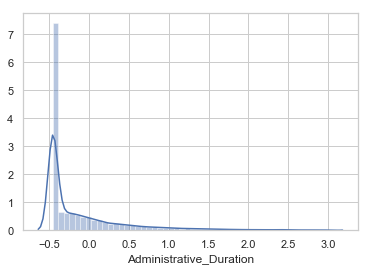

In [62]:
sns.distplot(df_new['Administrative_Duration']) 
plt.show()

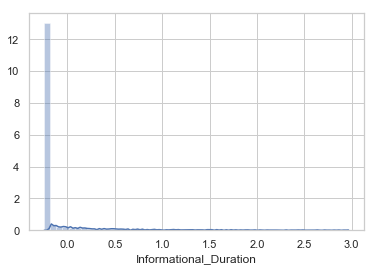

In [63]:
sns.distplot(df_new['Informational_Duration']) 
plt.show()

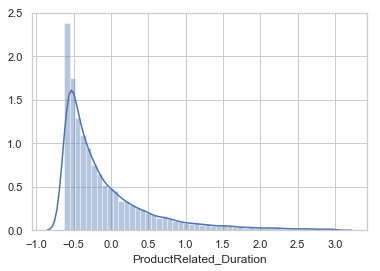

In [64]:
sns.distplot(df_new['ProductRelated_Duration']) 
plt.show()

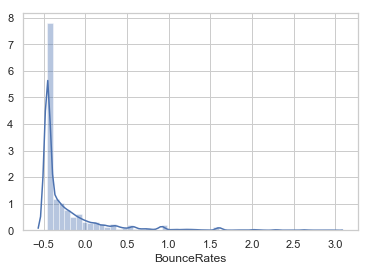

In [65]:
sns.distplot(df_new['BounceRates']) 
plt.show()


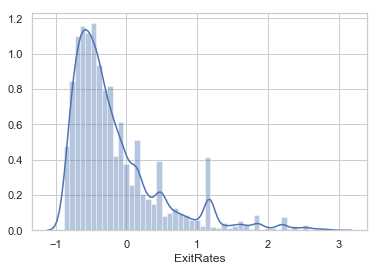

In [66]:
sns.distplot(df_new['ExitRates']) 
plt.show()

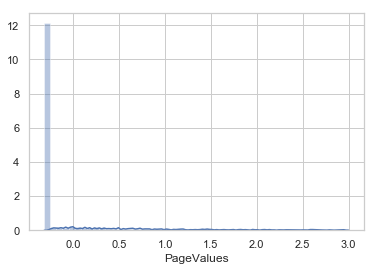

In [67]:
sns.distplot(df_new['PageValues']) 
plt.show()

In [68]:
df2new= dff.select_dtypes(include=['object','category','bool']).copy()
df2new.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,area_bins1,Info_bins1,product_bins1
0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0views,0views,Less than 10 views
1,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0views,0views,Less than 10 views
2,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0views,0views,Less than 10 views
3,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0views,0views,Less than 10 views
4,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0views,0views,Less than 10 views


In [69]:
df_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
1,-0.457191,-0.244931,-0.590903,-0.457683,1.171473,-0.317178
3,-0.457191,-0.244931,-0.622954,0.573535,1.994610,-0.317178
4,-0.457191,-0.244931,-0.296430,-0.045196,0.142551,-0.317178
5,-0.457191,-0.244931,-0.543757,-0.132035,-0.380935,-0.317178
8,-0.457191,-0.244931,-0.605012,-0.457683,1.171473,-0.317178


In [70]:
#  Final Data set After Oulier treatment,

In [71]:
data= pd.merge(df_new,df2new, left_index=True, right_index=True)

In [72]:
data.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,area_bins1,Info_bins1,product_bins1
1,-0.457191,-0.244931,-0.590903,-0.457683,1.171473,-0.317178,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0views,0views,Less than 10 views
3,-0.457191,-0.244931,-0.622954,0.573535,1.994610,-0.317178,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0views,0views,Less than 10 views
4,-0.457191,-0.244931,-0.296430,-0.045196,0.142551,-0.317178,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0views,0views,Less than 10 views
5,-0.457191,-0.244931,-0.543757,-0.132035,-0.380935,-0.317178,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,0views,0views,10-50 views
8,-0.457191,-0.244931,-0.605012,-0.457683,1.171473,-0.317178,0.8,Feb,2,2,2,3,Returning_Visitor,False,False,0views,0views,Less than 10 views


In [73]:
data.shape

(10754, 18)

In [74]:
data[['Month','VisitorType','Weekend','Revenue','Info_bins1','product_bins1','area_bins1']]=data[['Month','VisitorType','Weekend','Revenue','Info_bins1','product_bins1','area_bins1']].astype('category')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10754 entries, 1 to 12329
Data columns (total 18 columns):
Administrative_Duration    10754 non-null float64
Informational_Duration     10754 non-null float64
ProductRelated_Duration    10754 non-null float64
BounceRates                10754 non-null float64
ExitRates                  10754 non-null float64
PageValues                 10754 non-null float64
SpecialDay                 10754 non-null category
Month                      10754 non-null category
OperatingSystems           10754 non-null category
Browser                    10754 non-null category
Region                     10754 non-null category
TrafficType                10754 non-null category
VisitorType                10754 non-null category
Weekend                    10754 non-null category
Revenue                    10754 non-null category
area_bins1                 10754 non-null category
Info_bins1                 10754 non-null category
product_bins1              107

# Chi square test for Categorical variables

In [76]:
from scipy.stats import chisquare,chi2_contingency
from decimal import *

#select only categorical fields for chi squared
x = data.select_dtypes(include='category').drop('Revenue',axis=1)
y = data['Revenue']
k = x.shape[1] 
for i in range(1,k):
    crosstab=pd.crosstab(x.iloc[:,i],y)
    chi_sq_stat,p_value,deg_freedom,exp_freq = chi2_contingency(crosstab)
    if p_value >0.05:
        print('p value for ',x.columns[i],' and revenue ',' is ',round(Decimal(p_value),5),'\n')
        print(pd.crosstab(y,x.iloc[:,i],normalize='columns'))
    
# p value is less than 0.05, # null hypothesis is rejected , so there is significant difference between 
#the  employess who leaving the organization when compared to x variables
#null hyp: there significant difference btn attrition and Gender

# null hypothesis is accepted , so there is no  significant difference between 
# the male employess who leaving the organization when compared to female employees who leaving the organization 

p value for  Region  and revenue   is  0.89072 

Region          1         2         3         4         5         6        7  \
Revenue                                                                        
False    0.853288  0.842583  0.859848  0.862136  0.855556  0.863955  0.85907   
True     0.146712  0.157417  0.140152  0.137864  0.144444  0.136045  0.14093   

Region          8         9  
Revenue                      
False    0.872774  0.859485  
True     0.127226  0.140515  


In [77]:
# so we can drop the column Region , hence there is no statistical relationhip between Region and Revenue

In [78]:
data_new=data.drop(['Region'], axis = 1)

# Annova for Continous varaibles

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
x = data.select_dtypes(include='float64')
y = data['Revenue']
#x='{0}~{1}'.format('Age', 'Attrition')
for i in x.columns:
    
    x='{0} ~ {1}'.format(i, 'Revenue')
    mod=ols(x,data=data).fit()
    aov_table =sm.stats.anova_lm(mod,type=2)
    
    #getting p value for anova table
    p_value = aov_table.iloc[0,4]
    if p_value > 0.05:
        print(x)
        #print(aov_table,'\n')
        print('p value : ',round(Decimal(p_value),5),'\n')

In [80]:
# All columns are statistically related with Rrevenue, so no continous columns are dropped

# Final Data for modeling

In [81]:
data_new.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue,area_bins1,Info_bins1,product_bins1
1,-0.457191,-0.244931,-0.590903,-0.457683,1.171473,-0.317178,0.0,Feb,2,2,2,Returning_Visitor,False,False,0views,0views,Less than 10 views
3,-0.457191,-0.244931,-0.622954,0.573535,1.994610,-0.317178,0.0,Feb,3,2,4,Returning_Visitor,False,False,0views,0views,Less than 10 views
4,-0.457191,-0.244931,-0.296430,-0.045196,0.142551,-0.317178,0.0,Feb,3,3,4,Returning_Visitor,True,False,0views,0views,Less than 10 views
5,-0.457191,-0.244931,-0.543757,-0.132035,-0.380935,-0.317178,0.0,Feb,2,2,3,Returning_Visitor,False,False,0views,0views,10-50 views
8,-0.457191,-0.244931,-0.605012,-0.457683,1.171473,-0.317178,0.8,Feb,2,2,3,Returning_Visitor,False,False,0views,0views,Less than 10 views


In [82]:
data_new.shape

(10754, 17)

In [84]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10754 entries, 1 to 12329
Data columns (total 17 columns):
Administrative_Duration    10754 non-null float64
Informational_Duration     10754 non-null float64
ProductRelated_Duration    10754 non-null float64
BounceRates                10754 non-null float64
ExitRates                  10754 non-null float64
PageValues                 10754 non-null float64
SpecialDay                 10754 non-null category
Month                      10754 non-null category
OperatingSystems           10754 non-null category
Browser                    10754 non-null category
TrafficType                10754 non-null category
VisitorType                10754 non-null category
Weekend                    10754 non-null category
Revenue                    10754 non-null category
area_bins1                 10754 non-null category
Info_bins1                 10754 non-null category
product_bins1              10754 non-null category
dtypes: category(11), float64(

In [168]:
df = pd.get_dummies(data_new,columns=['SpecialDay','Month','OperatingSystems','Browser','TrafficType',
                                           'VisitorType','Weekend','area_bins1','Info_bins1','product_bins1'])

In [169]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,...,Weekend_False,Weekend_True,area_bins1_0views,area_bins1_1-3views,area_bins1_morethan3views,Info_bins1_0views,Info_bins1_morethan0views,product_bins1_10-50 views,product_bins1_Less than 10 views,product_bins1_more than 50 views
1,-0.457191,-0.244931,-0.590903,-0.457683,1.171473,-0.317178,False,1,0,0,...,1,0,1,0,0,1,0,0,1,0
3,-0.457191,-0.244931,-0.622954,0.573535,1.994610,-0.317178,False,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,-0.457191,-0.244931,-0.296430,-0.045196,0.142551,-0.317178,False,1,0,0,...,0,1,1,0,0,1,0,0,1,0
5,-0.457191,-0.244931,-0.543757,-0.132035,-0.380935,-0.317178,False,1,0,0,...,1,0,1,0,0,1,0,1,0,0
8,-0.457191,-0.244931,-0.605012,-0.457683,1.171473,-0.317178,False,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [170]:
df['Revenue'].value_counts()

False    9211
True     1543
Name: Revenue, dtype: int64

In [171]:
df['Revenue']=df['Revenue'].astype('bool')

In [172]:
df.shape

(10754, 77)

In [174]:
y=df['Revenue']
y.head()

1    False
3    False
4    False
5    False
8    False
Name: Revenue, dtype: bool

In [175]:
df.drop(['Revenue'],axis =1,inplace=True)

In [201]:
df.shape

(10754, 76)

In [176]:
y.shape

(10754,)

# Model -Logistic Regression

In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y, test_size = 0.3,random_state = 5)

In [192]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [193]:
y_pred = lr.predict(X_test)

In [194]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

      False       0.92      0.97      0.94      2783
       True       0.71      0.44      0.55       444

avg / total       0.89      0.90      0.89      3227



In [208]:
from sklearn.metrics import classification_report,confusion_matrix
mat_LR = confusion_matrix(y_test,y_pred)
print("LR model confusion matrix = \n",mat_LR)

LR model confusion matrix = 
 [[2704   79]
 [ 247  197]]


In [207]:
print("Accuracy of Logistic regression model is : ",accuracy_score(y_test,y_pred))

Accuracy of Logistic regression model is :  0.8989773783700031


In [196]:
from sklearn import metrics
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positve rate')
    plt.ylabel('True positve rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds

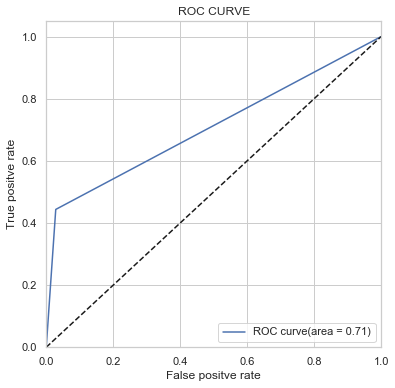

(array([0.        , 0.02838663, 1.        ]),
 array([0.        , 0.44369369, 1.        ]),
 array([2, 1, 0]))

In [197]:
draw_roc(y_test,y_pred)

# Model- KNN Classifier

In [209]:
from sklearn.neighbors import KNeighborsClassifier

In [287]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9,weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

In [288]:
prediction_train = knn.predict(X_train)
prediction_test = knn.predict(X_test)

In [289]:
print('With KNN (K=3) train accuracy is: ',knn.score(X_train,y_train)) # accuracy
print('With KNN (K=3) test accuracy is: ',knn.score(X_test,y_test)) # accuracy

With KNN (K=3) train accuracy is:  1.0
With KNN (K=3) test accuracy is:  0.8915401301518439


In [291]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

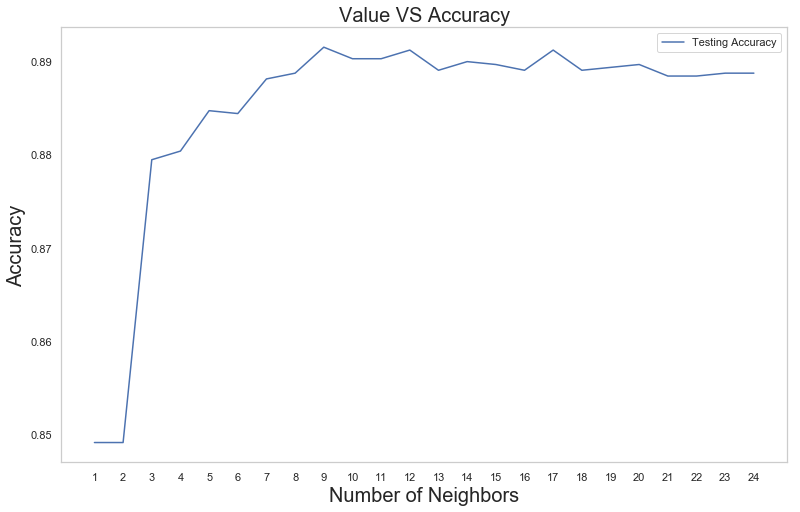

Best accuracy is 0.8915401301518439 with K = 9


In [293]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [294]:
from sklearn import metrics
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positve rate')
    plt.ylabel('True positve rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds

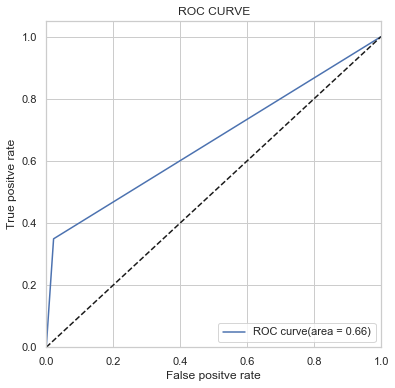

(array([0.        , 0.02191879, 1.        ]),
 array([0.       , 0.3490991, 1.       ]),
 array([2, 1, 0]))

In [295]:
draw_roc(y_test,prediction_test)

In [296]:
from sklearn.metrics import classification_report,confusion_matrix
mat_KNN = confusion_matrix(y_test,prediction_test)
print("LR model confusion matrix = \n",mat_LR)

LR model confusion matrix = 
 [[2704   79]
 [ 247  197]]


# model - Decision Tree

In [246]:
from sklearn.tree import DecisionTreeClassifier

model_gini=DecisionTreeClassifier(criterion='gini',max_depth=4)
model_gini.fit(X_train,y_train)


model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model_entropy.fit(X_train, y_train)

#predictions
preds_gini = model_gini.predict(X_test)
preds_gini_train = model_gini.predict(X_train)
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [247]:
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("gini model confusion matrix = \n",mat_gini)
mat_entropy = confusion_matrix(y_test,preds_entropy)
print("entropy model confusion matrix = \n",mat_entropy)

gini model confusion matrix = 
 [[2609  174]
 [ 169  275]]
entropy model confusion matrix = 
 [[2629  154]
 [ 182  262]]


In [248]:
from sklearn import metrics
print('gini')
print(metrics.classification_report(y_test,preds_gini))
print('entropy')
print(metrics.classification_report(y_test,preds_entropy))

gini
             precision    recall  f1-score   support

      False       0.94      0.94      0.94      2783
       True       0.61      0.62      0.62       444

avg / total       0.89      0.89      0.89      3227

entropy
             precision    recall  f1-score   support

      False       0.94      0.94      0.94      2783
       True       0.63      0.59      0.61       444

avg / total       0.89      0.90      0.89      3227



In [297]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=4)
model_gini.fit(X_train, y_train)
pred_train = model_gini.predict(X_train)
pred_test = model_gini.predict(X_test)
acc=metrics.accuracy_score(y_test,pred_test )
print("accuracy for Gini model with max_depth =4 is :",acc)

accuracy for Gini model with max_depth =4 is : 0.8937093275488069


In [298]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model_gini.fit(X_train, y_train)
pred_train = model_gini.predict(X_train)
pred_test = model_gini.predict(X_test)
acc=metrics.accuracy_score(y_test,pred_test )
print("accuracy for entropy model with max_depth =4is :",acc)

accuracy for entropy model with max_depth =4is : 0.89587852494577


In [234]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


In [235]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [236]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [237]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 4}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      2609       174
pos       169       275


In [232]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth
2,0.695,0.523,0.897,5
4,0.690,0.510,0.894,7
3,0.689,0.539,0.897,6
0,0.687,0.533,0.896,3
1,0.672,0.591,0.897,4
5,0.670,0.529,0.893,8


In [238]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [239]:
feature_cols = df.columns

In [244]:
model_pruned=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

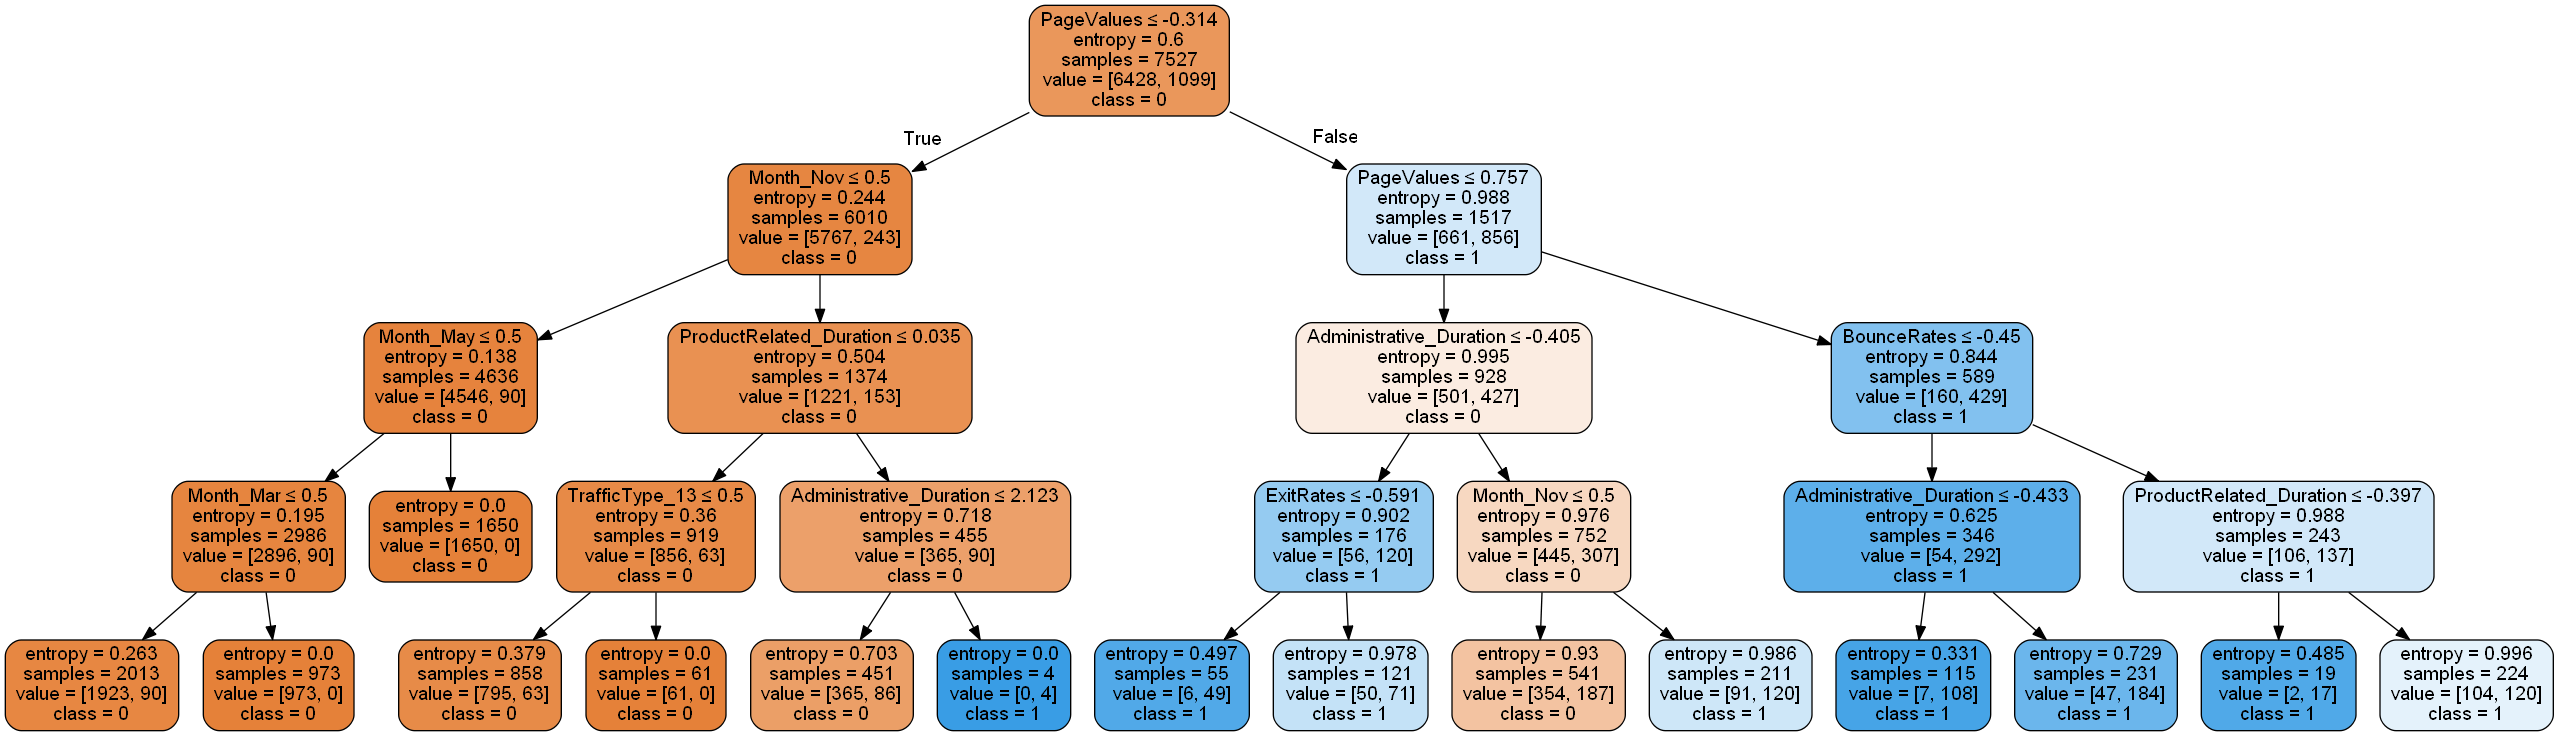

In [245]:
dot_data = StringIO()
export_graphviz(model_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_entropy.png')
Image(graph.create_png())

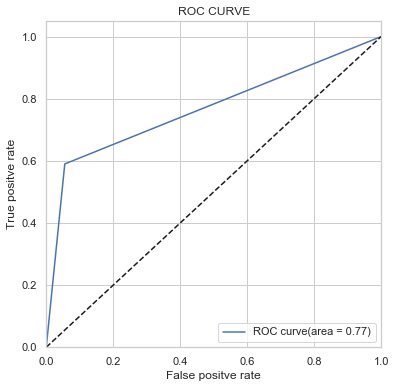

(array([0.        , 0.05533597, 1.        ]),
 array([0.        , 0.59009009, 1.        ]),
 array([2, 1, 0]))

In [271]:
draw_roc(y_test,pred_test)

# Model - Naives bayes

In [251]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [252]:
y_pred = classifier.predict(X_test)
y_pred

array([ True,  True,  True, ...,  True, False,  True])

In [253]:
from sklearn.naive_bayes import BernoulliNB

optimal_alpha = 1
NB_optimal = BernoulliNB(alpha=optimal_alpha)

# fitting the model
NB_optimal.fit(X_train, y_train)

BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [266]:
y_pred1 = NB_optimal.predict(X_test)
y_pred1

array([False, False,  True, ..., False, False, False])

In [256]:
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6',
       'SpecialDay_0.8', 'SpecialDay_1.0', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'Tr

In [257]:
np.round(NB_optimal.coef_,2)

array([[-1.02, -1.75, -0.78, -2.83, -2.54, -0.4 , -0.05, -4.61, -5.21,
        -3.83, -4.7 , -4.61, -3.07, -2.25, -5.91, -3.2 , -4.06, -2.3 ,
        -1.63, -0.95, -2.78, -3.  , -1.63, -0.52, -1.86, -3.05, -6.31,
        -5.91, -7.  , -5.06, -1.63, -0.47, -5.62, -2.49, -3.18, -4.61,
        -5.62, -4.44, -7.  , -3.87, -6.31, -5.62, -5.06, -1.93, -0.87,
        -2.23, -2.33, -3.29, -3.54, -4.81, -3.03, -6.31, -3.07, -3.71,
        -7.  , -3.87, -6.31, -7.  , -7.  , -7.  , -7.  , -6.31, -3.79,
        -1.58, -5.06, -0.24, -0.3 , -1.36, -1.29, -1.01, -1.01, -0.34,
        -1.24, -0.55, -1.86, -1.31]])

In [258]:
pos_class_prob_sorted = NB_optimal.coef_.argsort()
pos_class_prob_sorted

array([[58, 28, 57, 60, 38, 54, 59, 40, 26, 51, 56, 61, 14, 27, 41, 36,
        32,  8, 42, 29, 64, 49, 10,  7, 35, 11, 37, 16, 55, 39,  9, 62,
        53, 48, 47, 15, 34, 12, 52, 25, 50, 21,  3, 20,  4, 33, 46, 17,
        13, 45, 43, 24, 74,  1, 18, 30, 22, 63, 67, 75, 68, 72,  0, 69,
        70, 19, 44,  2, 73, 23, 31,  5, 71, 66, 65,  6]], dtype=int64)

In [260]:
topn_class2 = sorted(zip(NB_optimal.feature_count_[1], df.columns),reverse=True)[:12]
topn_class2

[(1042.0, 'SpecialDay_0.0'),
 (867.0, 'VisitorType_Returning_Visitor'),
 (817.0, 'Weekend_False'),
 (782.0, 'Info_bins1_0views'),
 (735.0, 'PageValues'),
 (690.0, 'Browser_2'),
 (654.0, 'OperatingSystems_2'),
 (633.0, 'product_bins1_10-50 views'),
 (504.0, 'ProductRelated_Duration'),
 (461.0, 'TrafficType_2'),
 (426.0, 'Month_Nov'),
 (399.0, 'area_bins1_morethan3views')]

In [261]:
def important_features(x,classifier,n=10):
    class_labels = classifier.classes_
    feature_names =x.columns
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat) 

In [263]:
important_features(df, NB_optimal,n=10)

True 1042.0 SpecialDay_0.0
True 867.0 VisitorType_Returning_Visitor
True 817.0 Weekend_False
True 782.0 Info_bins1_0views
True 735.0 PageValues
True 690.0 Browser_2
True 654.0 OperatingSystems_2
True 633.0 product_bins1_10-50 views
True 504.0 ProductRelated_Duration
True 461.0 TrafficType_2


In [267]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[2442,  341],
       [ 167,  277]], dtype=int64)

In [268]:
print(accuracy_score(y_test, y_pred1))

0.8425782460489619


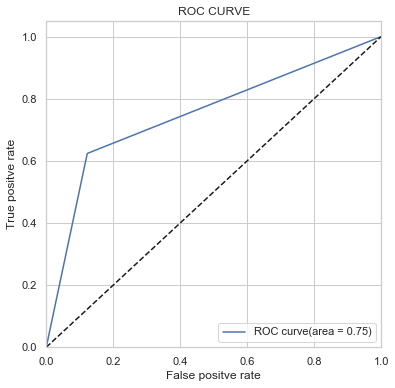

(array([0.        , 0.12252964, 1.        ]),
 array([0.        , 0.62387387, 1.        ]),
 array([2, 1, 0]))

In [269]:
draw_roc(y_test,y_pred1)

# Model- Random Forest

# Random forest - GINI model

In [276]:
clf = RandomForestClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [282]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [278]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 8}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      2737        46
pos       281       163


Random forest - Gini model max depth =8

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import BaggingRegressor
from   sklearn.metrics  import mean_squared_error
grid = {'n_estimators': np.arange(1,50,5)}
Rf_model = RandomForestClassifier(criterion='gini',max_depth=8,random_state=100)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
BC_grid = GridSearchCV(Rf_model, grid, cv=kf)
BC_grid.fit(X_train,y_train)


# Print hyperparameter
print("Best params : {}".format(BC_grid.best_params_)) 
print("Best score: {}".format(BC_grid.best_score_))

Best params : {'n_estimators': 41}
Best score: 0.8840175368672778


Random forest - Gini model max depth =8 and n - estimators = 41

# Random forest - Entropy model

In [281]:
clf = RandomForestClassifier(criterion='entropy')

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [283]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 8}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      2753        30
pos       334       110


Random forest - Gini model max depth =8

In [300]:
clf = RandomForestClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [301]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 8}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      2736        47
pos       312       132


In [284]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import BaggingRegressor
from   sklearn.metrics  import mean_squared_error
grid = {'n_estimators': np.arange(1,50,5)}
Rf_model = RandomForestClassifier(criterion='entropy',max_depth=8,random_state=100)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
BC_grid = GridSearchCV(Rf_model, grid, cv=kf)
BC_grid.fit(X_train,y_train)


# Print hyperparameter
print("Best params : {}".format(BC_grid.best_params_)) 
print("Best score: {}".format(BC_grid.best_score_))

Best params : {'n_estimators': 21}
Best score: 0.8849475222532217


Random forest - entropy model max depth =8 and n - estimators = 21

# Base Models

In [306]:
LR=LogisticRegression()

NB=GaussianNB()

KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')

DT_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)

DT_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)

RF_gini=RandomForestClassifier(n_estimators=41,max_depth=8,criterion='gini',random_state=0)

RF_entropy=RandomForestClassifier(n_estimators=21,max_depth=8,criterion='entropy',random_state=0)

# Bagging  Models

In [316]:
bag_LR=BaggingClassifier(base_estimator=LR,random_state=0)
bag_NB=BaggingClassifier(base_estimator=NB,random_state=0)
bag_KNN=BaggingClassifier(base_estimator=KNN,random_state=0)
bag_DT_gini = BaggingClassifier(base_estimator=DT_gini,random_state=0)
bag_DT_entropy = BaggingClassifier(base_estimator=DT_entropy,random_state=0)
bag_RF_gini = BaggingClassifier(base_estimator=RF_gini,random_state=0)
bag_RF_entropy = BaggingClassifier(base_estimator=RF_entropy,random_state=0)

# finding N - estimators for all models one by one using grid search

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import BaggingRegressor
from   sklearn.metrics  import mean_squared_error
grid = {'n_estimators': np.arange(1,50,5)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
BC_grid = GridSearchCV(bag_RF_entropy, grid, cv=kf,scoring='roc_auc')
BC_grid.fit(X_train,y_train)


# Print hyperparameter
print("Best params : {}".format(BC_grid.best_params_)) 
print("Best score: {}".format(BC_grid.best_score_))

Best params : {'n_estimators': 46}
Best score: 0.9138211278328843


# Bagged models

In [314]:
from sklearn.ensemble import BaggingClassifier

bagged_LR=BaggingClassifier(base_estimator=LR,n_estimators=36,random_state=0)
bagged_NB=BaggingClassifier(base_estimator=NB,n_estimators=81,random_state=0)
bagged_KNN=BaggingClassifier(base_estimator=KNN,n_estimators=50,random_state=0)
bagged_DT_gini = BaggingClassifier(base_estimator=DT_gini,n_estimators=46,random_state=0)
bagged_DT_entropy = BaggingClassifier(base_estimator=DT_entropy,n_estimators=31,random_state=0)
bagged_RF_gini = BaggingClassifier(base_estimator=RF_gini,n_estimators=46,random_state=0)
bagged_RF_entropy = BaggingClassifier(base_estimator=RF_entropy,n_estimators=46,random_state=0)


# boosting models

In [320]:
from sklearn.ensemble import AdaBoostClassifier

boost_LR =AdaBoostClassifier(base_estimator=LR,random_state=0)
boost_NB =AdaBoostClassifier(base_estimator=NB,random_state=0)
boost_KNN=BaggingClassifier(base_estimator=KNN,random_state=0)
boost_DT_gini= AdaBoostClassifier(base_estimator=DT_gini,random_state=0)
boost_DT_entropy = AdaBoostClassifier(base_estimator=DT_entropy,random_state=0)
boost_rf_gini = AdaBoostClassifier(base_estimator=RF_gini,random_state=0)
boost_rf_entrpoy = AdaBoostClassifier(base_estimator=RF_entropy,random_state=0)


# finding N - estimators for all models one by one using grid search

In [327]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import BaggingRegressor
from   sklearn.metrics  import mean_squared_error
grid = {'n_estimators': np.arange(1,50,5)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
BC_grid = GridSearchCV(boost_rf_entrpoy, grid, cv=kf,scoring='roc_auc')
BC_grid.fit(X_train,y_train)


# Print hyperparameter
print("Best params : {}".format(BC_grid.best_params_)) 
print("Best score: {}".format(BC_grid.best_score_))

Best params : {'n_estimators': 6}
Best score: 0.9221871184622747


# Boosted models

In [ ]:
boosted_LR =AdaBoostClassifier(base_estimator=LR,n_estimators=36,random_state=0)
boosted_NB =AdaBoostClassifier(base_estimator=NB,n_estimators=1,random_state=0)
boosted_KNN=BaggingClassifier(base_estimator=KNN,n_estimators=25,random_state=0)
boosted_DT_gini= AdaBoostClassifier(base_estimator=DT_gini,n_estimators=6,random_state=0)
boosted_DT_entropy = AdaBoostClassifier(base_estimator=DT_entropy,n_estimators=1,random_state=0)
boosted_rf_gini = AdaBoostClassifier(base_estimator=RF_gini,n_estimators=6,random_state=0)
boosted_rf_entrpoy = AdaBoostClassifier(base_estimator=RF_entropy,n_estimators=6,random_state=0)

# ALL models

In [335]:
# base line models


LR=LogisticRegression()
NB=BernoulliNB(alpha=optimal_alpha)
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')
DT_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
DT_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
RF_gini=RandomForestClassifier(n_estimators=41,max_depth=8,criterion='gini',random_state=0)
RF_entropy=RandomForestClassifier(n_estimators=21,max_depth=8,criterion='entropy',random_state=0)

# Bagged moodles

bagged_LR=BaggingClassifier(base_estimator=LR,n_estimators=36,random_state=0)
bagged_NB=BaggingClassifier(base_estimator=NB,n_estimators=81,random_state=0)
bagged_KNN=BaggingClassifier(base_estimator=KNN,n_estimators=50,random_state=0)
bagged_DT_gini = BaggingClassifier(base_estimator=DT_gini,n_estimators=46,random_state=0)
bagged_DT_entropy = BaggingClassifier(base_estimator=DT_entropy,n_estimators=31,random_state=0)
bagged_RF_gini = BaggingClassifier(base_estimator=RF_gini,n_estimators=46,random_state=0)
bagged_RF_entropy = BaggingClassifier(base_estimator=RF_entropy,n_estimators=46,random_state=0)

# Booseted models

boosted_LR =AdaBoostClassifier(base_estimator=LR,n_estimators=36,random_state=0)
boosted_NB =AdaBoostClassifier(base_estimator=NB,n_estimators=1,random_state=0)
boosted_KNN=BaggingClassifier(base_estimator=KNN,n_estimators=25,random_state=0)
boosted_DT_gini= AdaBoostClassifier(base_estimator=DT_gini,n_estimators=6,random_state=0)
boosted_DT_entropy = AdaBoostClassifier(base_estimator=DT_entropy,n_estimators=1,random_state=0)
boosted_rf_gini = AdaBoostClassifier(base_estimator=RF_gini,n_estimators=6,random_state=0)
boosted_rf_entropy = AdaBoostClassifier(base_estimator=RF_entropy,n_estimators=6,random_state=0)



In [336]:
all_models= ['LR','NB','KNN','DT_gini','DT_entropy','RF_gini','RF_entropy','bagged_LR','bagged_NB','bagged_KNN','bagged_DT_gini',
             'bagged_DT_entropy','bagged_RF_gini','bagged_RF_entropy','boosted_LR','boosted_NB','boosted_KNN','boosted_DT_gin',
             'boosted_DT_entropy','boosted_rf_gini','boosted_rf_entropy']
models_err=pd.DataFrame({'Var':np.NaN,'Bias':np.NaN},index=all_models)
for model,names in zip([LR,NB,KNN,DT_gini,DT_entropy,RF_gini,RF_entropy,bagged_LR,bagged_NB,
                        bagged_KNN,bagged_DT_gini,bagged_DT_entropy,bagged_RF_gini,bagged_RF_entropy,boosted_LR,
                        boosted_NB,boosted_KNN,boosted_DT_gini,boosted_DT_entropy,boosted_rf_gini,boosted_rf_entropy],all_models):
    accuracy = []
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_predict)
    accuracy.append(round(acc*100,2))
    print("Accuracy:" ,accuracy,names)

Accuracy: [89.9] LR
Accuracy: [84.26] NB
Accuracy: [89.15] KNN
Accuracy: [89.37] DT_gini
Accuracy: [89.59] DT_entropy
Accuracy: [89.0] RF_gini
Accuracy: [89.12] RF_entropy
Accuracy: [89.96] bagged_LR
Accuracy: [84.54] bagged_NB
Accuracy: [89.0] bagged_KNN
Accuracy: [90.11] bagged_DT_gini
Accuracy: [90.52] bagged_DT_entropy
Accuracy: [89.56] bagged_RF_gini
Accuracy: [89.62] bagged_RF_entropy
Accuracy: [89.4] boosted_LR
Accuracy: [86.24] boosted_NB
Accuracy: [88.91] boosted_KNN
Accuracy: [89.77] boosted_DT_gin
Accuracy: [89.59] boosted_DT_entropy
Accuracy: [90.49] boosted_rf_gini
Accuracy: [90.33] boosted_rf_entropy


In [344]:
all_models= ['LR','NB','KNN','DT_gini','DT_entropy','RF_gini','RF_entropy','bagged_LR','bagged_NB','bagged_KNN','bagged_DT_gini',
             'bagged_DT_entropy','bagged_RF_gini','bagged_RF_entropy','boosted_LR','boosted_NB','boosted_KNN','boosted_DT_gin',
             'boosted_DT_entropy','boosted_rf_gini','boosted_rf_entropy']
models_err=pd.DataFrame({'Var':np.NaN,'Bias':np.NaN},index=all_models)
for model,names in zip([LR,NB,KNN,DT_gini,DT_entropy,RF_gini,RF_entropy,bagged_LR,bagged_NB,
                        bagged_KNN,bagged_DT_gini,bagged_DT_entropy,bagged_RF_gini,bagged_RF_entropy,boosted_LR,
                        boosted_NB,boosted_KNN,boosted_DT_gini,boosted_DT_entropy,boosted_rf_gini,boosted_rf_entropy],all_models):
    roc_auc= []
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix(y_test,y_predict)
    fpr,tpr, _ = roc_curve(y_test,y_predict)
    roc_auc.append(auc(fpr, tpr))
    print("AUC scores: %0.02f [%s]" % (np.mean(roc_auc), names )) 

AUC scores: 0.71 [LR]
AUC scores: 0.75 [NB]
AUC scores: 0.66 [KNN]
AUC scores: 0.78 [DT_gini]
AUC scores: 0.77 [DT_entropy]
AUC scores: 0.63 [RF_gini]
AUC scores: 0.64 [RF_entropy]
AUC scores: 0.71 [bagged_LR]
AUC scores: 0.75 [bagged_NB]
AUC scores: 0.66 [bagged_KNN]
AUC scores: 0.76 [bagged_DT_gini]
AUC scores: 0.77 [bagged_DT_entropy]
AUC scores: 0.64 [bagged_RF_gini]
AUC scores: 0.64 [bagged_RF_entropy]
AUC scores: 0.68 [boosted_LR]
AUC scores: 0.50 [boosted_NB]
AUC scores: 0.66 [boosted_KNN]
AUC scores: 0.76 [boosted_DT_gin]
AUC scores: 0.77 [boosted_DT_entropy]
AUC scores: 0.75 [boosted_rf_gini]
AUC scores: 0.74 [boosted_rf_entropy]
